# Plotting Geological (poly/line) Data with ModEM Phase Tensors

This notebook demonstrates how to plot geological polygon/line data overlain by ModEM phase tensors. Polygonal data in a given shapefile can be coloured according to a given lookup table.

In [1]:
# Add mtpy folder to python path. This may not be necessary 
# depending on how mtpy was installed.
import sys

#sys.path.append('/path/to/mtpy')
sys.path.append('/home/rakib/work/ausLAMP/codes/mtGeoMtpy')

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib import colors
import matplotlib.cm as cm

from matplotlib.patches import Polygon as MPLPolygon
from mpl_toolkits.basemap import pyproj
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset

# Import required classes from key mtpy modules 
from mtpy.imaging2.geology import Geology
from mtpy.imaging2.modem_ptensors import ModEM_ptensors

%matplotlib inline

If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk
Note: if you are using Windows you should build evtk first witheither MinGW or cygwin using the command: 
    python setup.py build -compiler=mingw32  or 
    python setup.py build -compiler=cygwin
If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk
Note: if you are using Windows you should build evtk first witheither MinGW or cygwin using the command: 
    python setup.py build -compiler=mingw32  or 
    python setup.py build -compiler=cygwin
If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk


If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk


## Load Geological Data

* The **Geology** class is used to load both polygon and line data from two separate shapefiles

In [9]:
polySFN = '../data/geology/NT_LithInterp_2500K_region.shp'
lineSFN = '../data/geology/NT_Fault_2500K_polyline.shp'
lutFN = '../data/geology/colour_lut.txt'
lutFN = '/tmp/lut.txt'

# set clip extents for shapefile
minLat = -25
maxLat = -21
minLon = 133.5
maxLon = 136.5


polyData = Geology(polySFN, minLon=minLon, maxLon=maxLon, minLat=minLat, maxLat=maxLat)
lineData = Geology(lineSFN)

## Load ModEM Phase Tensors

The **ModEM_ptensors** class is used to load a ModEM data file.

In [4]:
modemFN = '../data/ModEM_files/ModEM_Data_im2.dat'

modemPT = ModEM_ptensors(modemFN)

/home/rakib/work/ausLAMP/codes/mtGeoMtpy/mtpy/analysis/pt.py:686: RuntimeWarning: divide by zero encountered in divide
  pi2err = 1./ pi2 * np.sqrt( (self.pt[:,0,0] + self.pt[:,1,1] )**2*\
/home/rakib/work/ausLAMP/codes/mtGeoMtpy/mtpy/analysis/pt.py:689: RuntimeWarning: invalid value encountered in multiply
  (self.pt_err[:,0,1]**2 + self.pt_err[:,1,0]**2))
/home/rakib/work/ausLAMP/codes/mtGeoMtpy/mtpy/analysis/pt.py:660: RuntimeWarning: divide by zero encountered in divide
  pi1err = 1./ pi1 * np.sqrt((self.pt[:,0,0] - self.pt[:,1,1])**2*\
/home/rakib/work/ausLAMP/codes/mtGeoMtpy/mtpy/analysis/pt.py:663: RuntimeWarning: invalid value encountered in multiply
  (self.pt_err[:,0,1]**2 + self.pt_err[:,1,0]**2))
/home/rakib/work/ausLAMP/codes/mtGeoMtpy/mtpy/analysis/pt.py:600: RuntimeWarning: invalid value encountered in divide
  return (self.phimax-self.phimin)/(self.phimax+self.phimin)


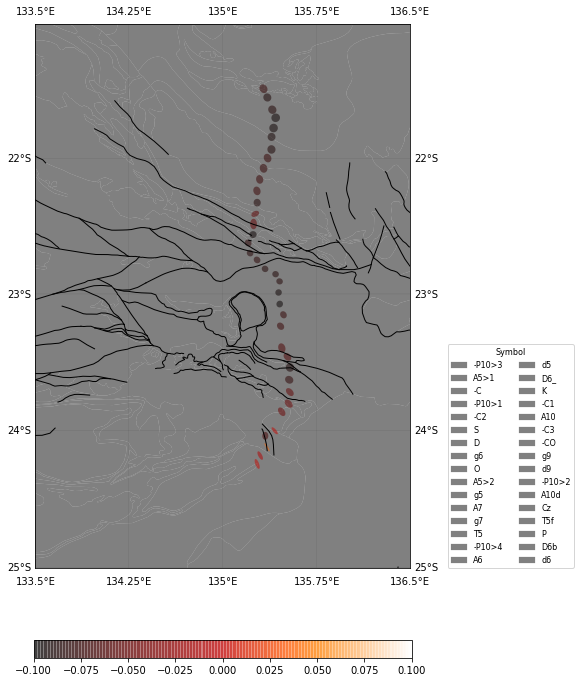

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

m = Basemap(resolution='c', # c, l, i, h, f or None
            ax=ax,
            projection='merc',
            lat_0=-22, lon_0=135,
            llcrnrlon=minLon, llcrnrlat=minLat, urcrnrlon=maxLon, urcrnrlat=maxLat)

# draw lat-lon grids
m.drawparallels(np.linspace(minLat, maxLat, 5), labels=[1,1,0,0], linewidth=0.1)
m.drawmeridians(np.linspace(minLon, maxLon, 5), labels=[0,0,1,1], linewidth=0.1)

# plot geology ===================================================================

# plot polygons using a color lookup table
h,l = polyData.plot(ax, m, lutfn=lutFN, linewidth=0.2, edgecolor='face', alpha=1)

# plot line data
lineData.plot(ax, m, alpha=1, color='k', linewidth=1.0)

# create legend including all symbols used in the plot
leg = ax.legend(h, l, loc=3,
                  bbox_to_anchor=(1.1, 0),
                  borderaxespad=0,
                  handlelength=2,
                  title= 'Symbol',
                  ncol=2,
                  fontsize=8)
leg.get_title().set_fontsize(8)

# plot phase tensors =============================================================
# fetch attribute to color phase tensor ellipses with
cmapAttrib = modemPT.get_period_attributes(16, 'ellipticity')
sm = cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=np.min(cmapAttrib), 
                                                 vmax=np.max(cmapAttrib)),  
                       cmap='gist_heat')
# extract color values from colormap
cvals = sm.cmap(cmapAttrib)
modemPT.plot(ax, m, periodIdx=16, cvals=cvals, edgecolor='none', alpha=0.5)

# show colormap
cbax = fig.add_axes([0.25,0,0.525,.025])
cbar = mpl.colorbar.ColorbarBase(cbax, cmap=sm.cmap,
                                 norm = sm.norm,
                                 orientation='horizontal',
                                 alpha=0.5)
#cbar.solids.set_edgecolor("face", alpha=0.5)

plt.savefig('/tmp/a.pdf', dpi=300)

## Load Magnetics

In [6]:
# load magnetics 
magFN = '../data/magnetics/magLowRes.nc'
mag = Dataset(magFN)

# print variable names to be able to access the raw data
print mag.variables

OrderedDict([(u'lon', <type 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    units: degrees_east
    actual_range: [ 133.50960704  136.51043917]
unlimited dimensions: 
current shape = (301,)
filling off
), (u'lat', <type 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    units: degrees_north
    actual_range: [-25.00690511 -21.00524004]
unlimited dimensions: 
current shape = (401,)
filling off
), (u'z', <type 'netCDF4._netCDF4.Variable'>
float32 z(lat, lon)
    long_name: z
    _FillValue: nan
    actual_range: [-1887.55480957  4829.68603516]
unlimited dimensions: 
current shape = (401, 301)
filling off
)])


In [7]:
# Load the raw data
maglons = mag.variables['lon'][:]
maglats = mag.variables['lat'][:]
magvs = mag.variables['z'][:]

maglons, maglats = np.meshgrid(maglons, maglats)

# project lats and lons
magpx, magpy = m(maglons, maglats)


## Show Raster Data Overlain by Phase Tensors


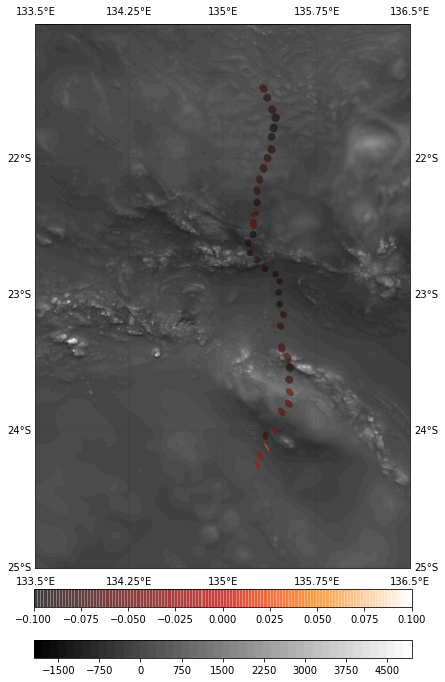

In [8]:
# plot magnetics and phase tensors
# set plot extents and dimensions
minLat = -25
maxLat = -21
minLon = 133.5
maxLon = 136.5

fig, ax = plt.subplots(figsize=(10,10))

m = Basemap(resolution='c', # c, l, i, h, f or None
            ax=ax,
            projection='merc',
            lat_0=-22, lon_0=135,
            llcrnrlon=minLon, llcrnrlat=minLat, urcrnrlon=maxLon, urcrnrlat=maxLat)

# draw lat-lon grids
m.drawparallels(np.linspace(minLat, maxLat, 5), labels=[1,1,0,0], linewidth=0.1)
m.drawmeridians(np.linspace(minLon, maxLon, 5), labels=[0,0,1,1], linewidth=0.1)

# plot magnetics
c = m.contourf(magpx, magpy, magvs, 50, cmap='gray', rasterized=True)
cbax1 = fig.add_axes([0.25,0,0.525,0.025])
fig.colorbar(c, cbax1, orientation='horizontal')

# plot phase tensors
modemPT.plot(ax, m, periodIdx=16, cvals=cvals, alpha=0.5)
cbax2 = fig.add_axes([0.25,0.07,0.525,0.025])
cbar = mpl.colorbar.ColorbarBase(cbax2, cmap=sm.cmap,
                                 norm = sm.norm,
                                 orientation='horizontal',
                                 alpha=0.5)